# 朴素贝叶斯分类器   naive_bayes.GaussianNB()

In [1]:
from sklearn import datasets
# 聚类数据生成器：
# 数据量n_samples=100，
# 数据维度n_features=2，
# 类别数centers=3，
# cluster_std表示每个类别的方差
x, y = datasets.make_blobs(100, 2, centers=3, random_state=1701, cluster_std=2)

In [2]:
print(x.shape, y.shape)

(100, 2) (100,)


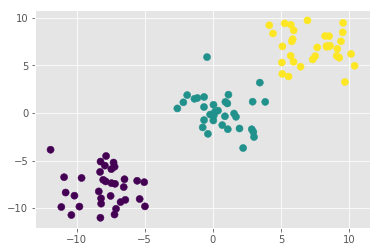

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.scatter(x[:, 0], x[:, 1], c=y, s=50)  # c = y,可以按照不同标签分配颜色
plt.show()

In [9]:
from sklearn import model_selection
# import numpy as np
# x = x.astype(np.float32)  # 如果用opencv，需要注意转换格式
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.1)
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

## opencv——正态贝叶斯分类器
- opencv并不能提供一个真正的朴素贝叶斯分类器
- 它提供的分类器希望数据已经被聚类成高斯分布
- 此部分内容见书本7.2.2章节

## sklearn——朴素贝叶斯分类器

In [10]:
from sklearn import naive_bayes
model_bayes = naive_bayes.GaussianNB()
model_bayes.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
# 计算准确率
model_bayes.score(x_test, y_test)

1.0

In [12]:
y_prob = model_bayes.predict_proba(x_test)  # 返回概率值
rst = y_prob.round(2)  # 保留两位小数
print(rst)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [13]:
y_pred = model_bayes.predict(x_test)
print(y_pred)

[1 1 2 2 0 2 0 0 0 1]


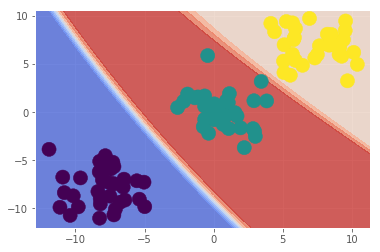

In [14]:
# 条件概率的可视化
import numpy as np
def plot_probability(model, x_test, y_test):
    # create a mesh to plot in
    h = 0.2
    x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
    y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # 让函数在opencv和sklearn下都能工作，需要转换为float32
    x_hypo = np.column_stack((xx.ravel().astype(np.float32),
                             yy.ravel().astype(np.float32)))

    if hasattr(model, 'predictProb'):  # 检查model是否有predictProb方法
        _, _, y_proba = model.predictProb(x_hypo)
    else:
        y_proba = model.predict_proba(x_hypo)

    zz = y_proba[:, 1] - y_proba[:, 0]
    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y_test, s=200)
    plt.show()

plot_probability(model_bayes, x, y)